#### Initialize Functions

In [2]:
from textblob import TextBlob
import json
import matplotlib.pyplot as plt
from collections import defaultdict

In [3]:
def getBarGraph(x,y):
  plt.bar(x, y, color=['green', 'red'])
  plt.xlabel('Emotion')
  plt.ylabel('Count')
  plt.title(f'Total Count of Satisfaction and Unsatisfied Occurrences ({sum(y)})')
  plt.show()

In [1]:
#gpt threshold is the threshold for cutting of polarity of gpt between satisfied or not
#user threshold is the threshold for user prompts, satisfied or not
def getSentimentAnalysis(fsObject,gptThreshold,userThreshold):
  reactions = []
  languages = defaultdict(list)
  percent = 5
  for i in fsObject:
    totalConversations = len(i['Conversations'])-1
    fromIndex = totalConversations-round(percent * totalConversations / 100.0)
    answerPolarity = []
    promptPolarity = []
    for x in i['Conversations']:
      userPolarity = TextBlob(x['Prompt']).sentiment.polarity
      gptPolarity = TextBlob(x['Answer']).sentiment.polarity
      promptPolarity.append(userPolarity)
      answerPolarity.append(gptPolarity)

    #Checking if ChatGPT able to solve the problem by observing all the answers given
    posOrNeg = 1 if min(answerPolarity) >= gptThreshold else -1


    lengthOfConversation = len(i['Conversations'])
    for index in range(lengthOfConversation):
      languagePolarity = 0
      if index+1<lengthOfConversation:

        # if promptPolarity[index+1]<0:
        #   languagePolarity = -1
        # elif promptPolarity[index+1]>0:
        #   languagePolarity = 1

        languagePolarity = 1 if promptPolarity[index+1]>userThreshold else -1
      else:
        languagePolarity = 1
      for code in i['Conversations'][index]['ListOfCode']:
        if code['Type']:
          codeType = code['Type'].lower()
          if codeType in ['csharp','c#','C#']:
            codeType = 'c#'
          languages[codeType].append(languagePolarity)
    reactions.append(posOrNeg)
  return reactions,languages

In [4]:
def readJSONObj(jsonFilePath):
  with open(jsonFilePath, 'rb') as file:
      fsObject = json.load(file)
  return fsObject

In [5]:
def initializeJSON(numberOfFiles):
  objArray = []
  for i in range(1,numberOfFiles):
    jsonObj = readJSONObj(f'/content/filteredJSON{i}.json')
    objArray.append(jsonObj)
  return objArray

In [6]:
def getSatisfactionGraph(totalFSReactions):
  labels = ['Happy','Sad']
  hCount,sCount = 0,0
  for i in totalFSReactions:
    if i==1:
      hCount+=1
    else:
      sCount+=1
  print(f'Satisfied Count: {hCount} and Unsatisfied count: {sCount}')
  counts = [hCount,sCount]
  getBarGraph(labels,counts)

In [7]:
def getSatisfactionGraphByLanguageWithBias(totalFSLang,totalFSReactions):
  categories = ['Happy','Sad']
  index = range(len(totalFSLang))

  totalLanguages = totalFSLang.keys()
  neutralCounts = [totalFSLang[x].count(0)//2 for x in totalFSLang]
  sadCounts = [totalFSLang[x].count(-1) +y for x,y in zip(totalFSLang,neutralCounts)]
  happyCounts = [totalFSLang[x].count(1) +y for x,y in zip(totalFSLang,neutralCounts)]

  bar_width = 0.35
  fig, ax = plt.subplots(figsize=(20, 6))
  bar1 = ax.bar(index, happyCounts, bar_width, label='Happy')
  bar2 = ax.bar([i + bar_width for i in index], sadCounts, bar_width, label='Sad')

  ax.set_xlabel('Languages')
  ax.set_ylabel('Percentage')
  ax.set_title('Satisfactory level by Language')

  ax.set_xticks([i + bar_width/2 for i in index]) # for 2 bars
  ax.set_xticklabels(totalLanguages,rotation=90)
  ax.legend()

  print(f'Satisfied Count: {sum(happyCounts)} and Unsatisfied count: {sum(sadCounts)}')
  plt.show()

# getSatisfactionGraphByLanguage(totalFSLang,totalFSReactions)

In [8]:
def getSatisfactionGraphByLanguageWithNeutral(totalFSLang,totalFSReactions):
  categories = ['Happy','Sad']
  index = range(len(totalFSLang))

  totalLanguages = totalFSLang.keys()
  happyCounts = [totalFSLang[x].count(1) for x in totalFSLang]
  neutralCounts = [totalFSLang[x].count(0) for x in totalFSLang]
  sadCounts = [totalFSLang[x].count(-1) for x in totalFSLang]

  bar_width = 0.2
  fig, ax = plt.subplots(figsize=(20, 6))
  # bar1 = ax.bar(index, happyCounts, bar_width, label='Happy')
  # bar2 = ax.bar([i + bar_width for i in index], sadCounts, bar_width, label='Sad')
  # bar3 = ax.bar([i + 2 *bar_width for i in index], neutralCounts, bar_width, label='Neutral')

  bar1 = ax.bar([i - 0.2 for i in index], happyCounts, bar_width, label='Happy')
  bar2 = ax.bar(index, sadCounts, bar_width, label='Sad')
  bar3 = ax.bar([i + 0.2 for i in index], neutralCounts, bar_width, label='Neutral')

  ax.set_xlabel('Languages')
  ax.set_ylabel('Percentage')
  ax.set_title('Satisfactory level by Language')

  # ax.set_xticks([i + bar_width/2 for i in index]) # for 2 bars
  ax.set_xticks([i for i in index])
  ax.set_xticklabels(totalLanguages,rotation=90)
  ax.legend()

  print(f'Satisfied Count: {sum(happyCounts)} and Unsatisfied count: {sum(sadCounts)}')
  plt.show()

# getSatisfactionGraphByLanguage(totalFSLang,totalFSReactions)

#### Initialize JSON

In [28]:
jsonObjects = initializeJSON(10)

#### Finding the threshold for ChatGPT able to answer

happy Count: 637 and sad count: 263


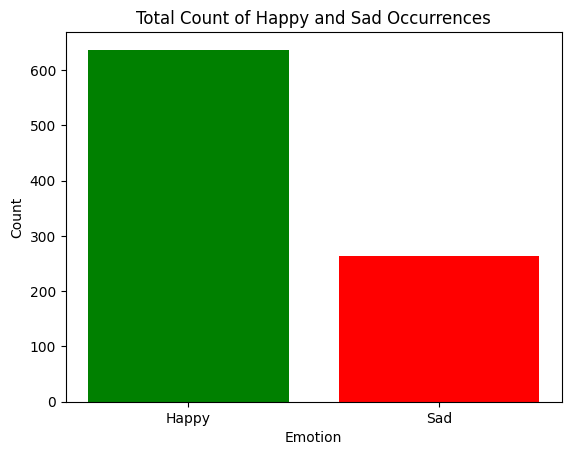

Sentiment analysis completed on file with threshold 0.0 
------------------------------------------------------------
happy Count: 453 and sad count: 447


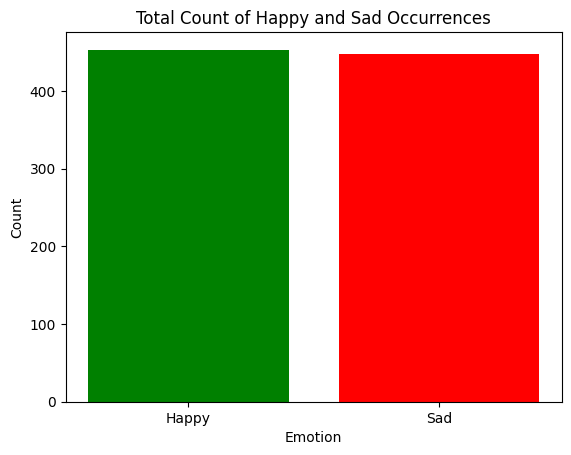

Sentiment analysis completed on file with threshold 0.01 
------------------------------------------------------------
happy Count: 424 and sad count: 476


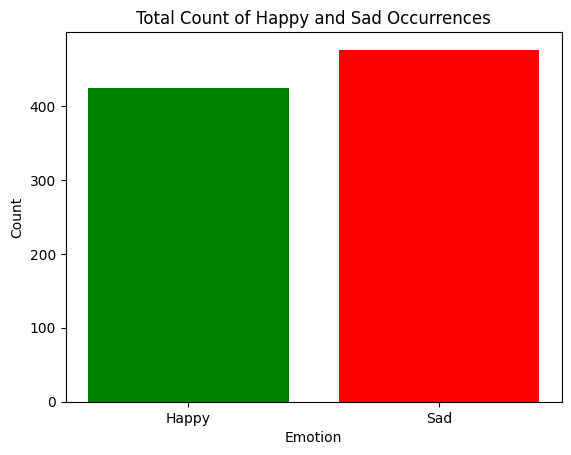

Sentiment analysis completed on file with threshold 0.02 
------------------------------------------------------------
happy Count: 408 and sad count: 492


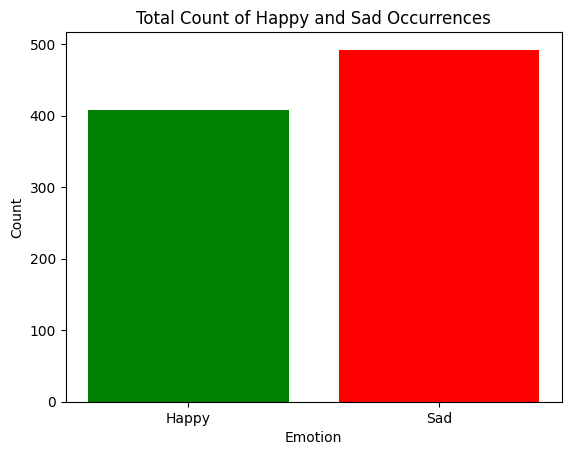

Sentiment analysis completed on file with threshold 0.03 
------------------------------------------------------------
happy Count: 391 and sad count: 509


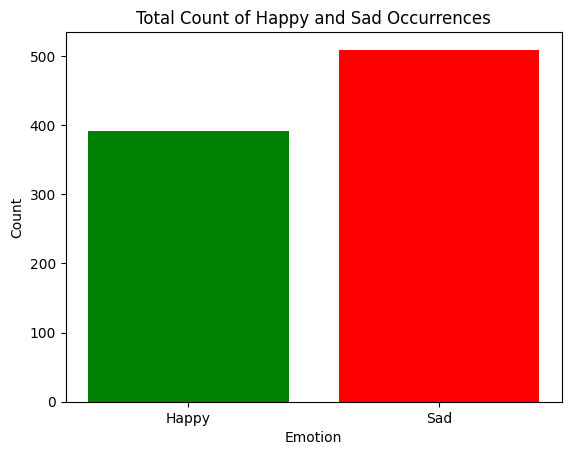

Sentiment analysis completed on file with threshold 0.04 
------------------------------------------------------------
happy Count: 360 and sad count: 540


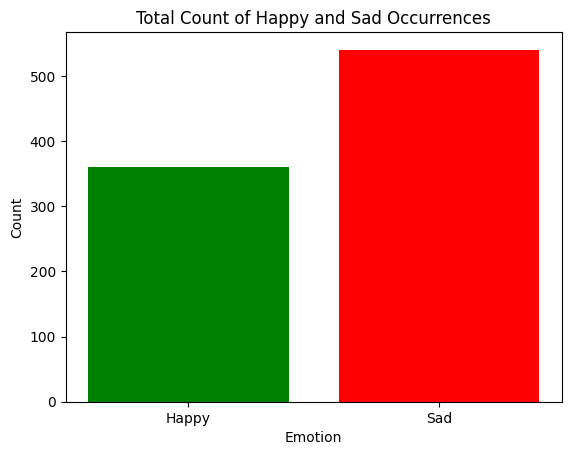

Sentiment analysis completed on file with threshold 0.05 
------------------------------------------------------------
happy Count: 341 and sad count: 559


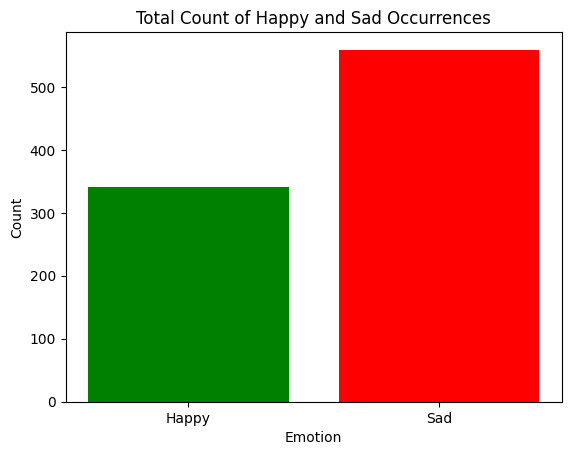

Sentiment analysis completed on file with threshold 0.06 
------------------------------------------------------------
happy Count: 320 and sad count: 580


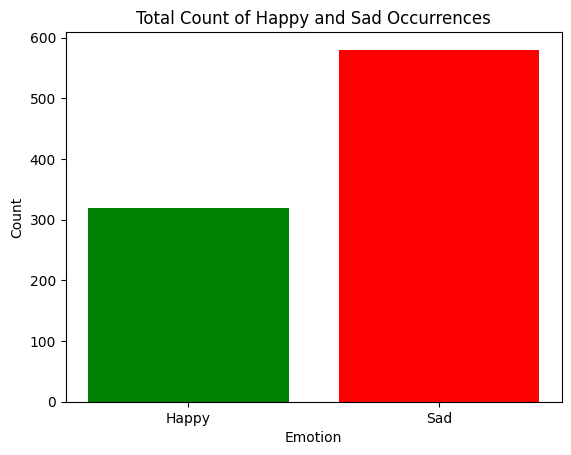

Sentiment analysis completed on file with threshold 0.07 
------------------------------------------------------------
happy Count: 306 and sad count: 594


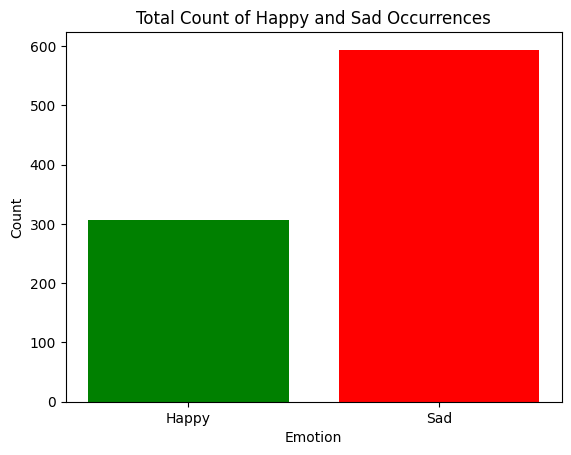

Sentiment analysis completed on file with threshold 0.08 
------------------------------------------------------------
happy Count: 276 and sad count: 624


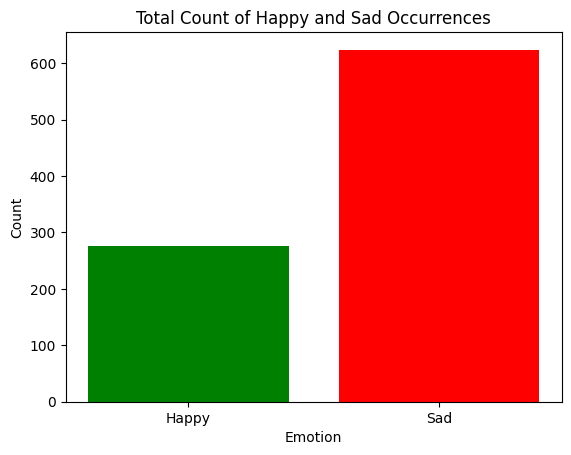

Sentiment analysis completed on file with threshold 0.09 
------------------------------------------------------------


In [66]:
for i in range(10):
  threshold = 0+i*0.01
  totalFSReactions,totalFSLang = [],defaultdict(list)

  for index,obj in enumerate(jsonObjects):
    reacts, langs = getSentimentAnalysis(obj,threshold,threshold)
    totalFSReactions.extend(reacts)
    totalFSLang.extend(langs)
  getSatisfactionGraph(totalFSReactions)

  print(f'Sentiment analysis completed on file with threshold {threshold} ')

  print('--'*30)

##### Found that threshold with no bias gives good results

####Finding Threshold for language satisfaction

Completed for file  1
Completed for file  2
Completed for file  3
Completed for file  4
Completed for file  5
Completed for file  6
Completed for file  7
Completed for file  8
Completed for file  9


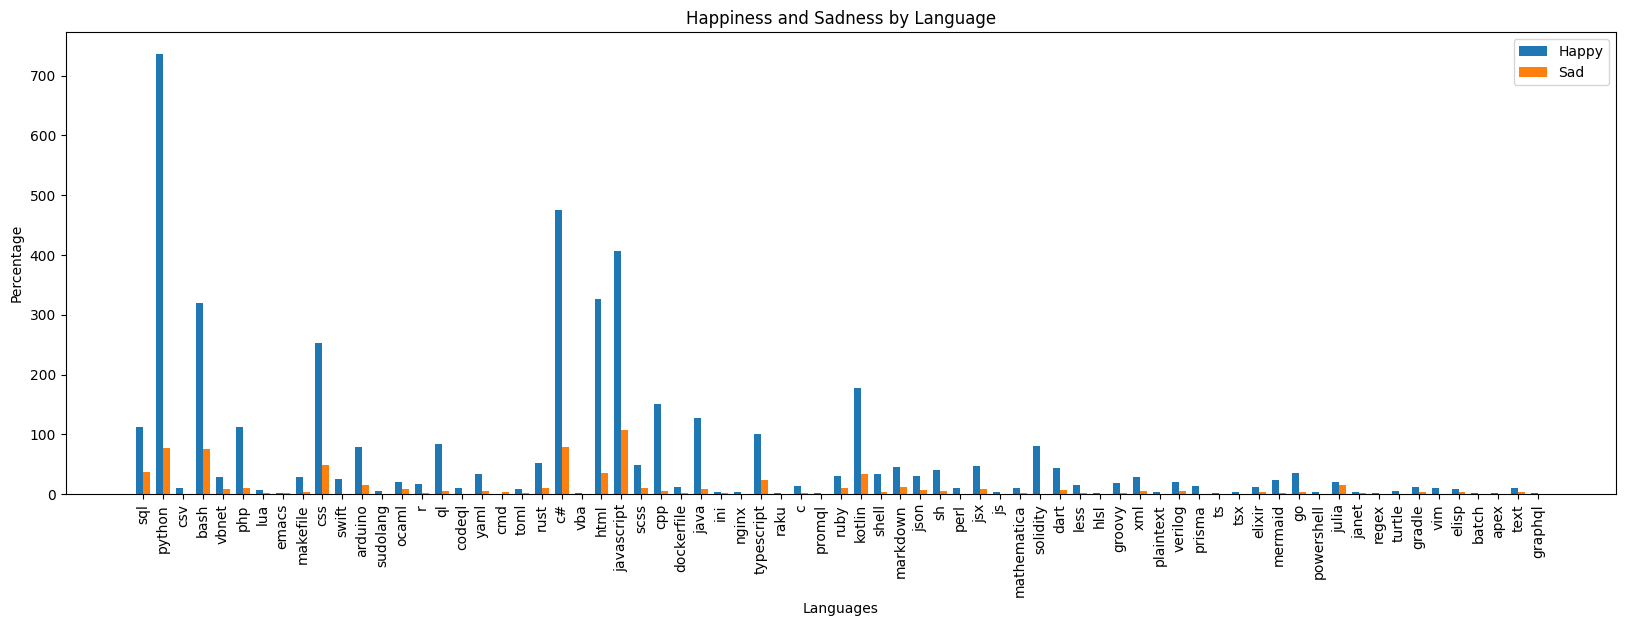

Sentiment analysis completed on file with threshold 0.0 
------------------------------------------------------------
Completed for file  1
Completed for file  2
Completed for file  3
Completed for file  4
Completed for file  5
Completed for file  6
Completed for file  7
Completed for file  8
Completed for file  9


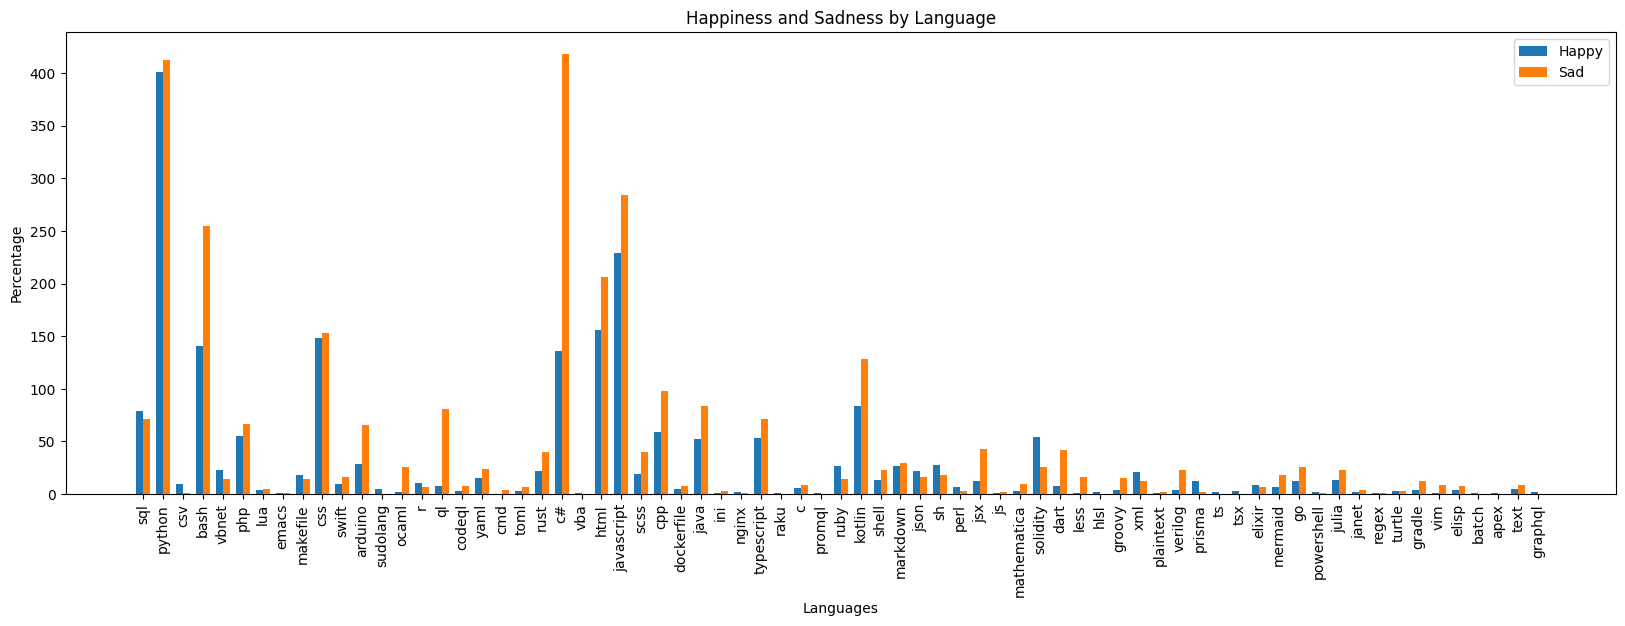

Sentiment analysis completed on file with threshold 0.001 
------------------------------------------------------------
Completed for file  1
Completed for file  2


KeyboardInterrupt: ignored

In [65]:
for i in range(10):
  threshold = 0+i*0.001
  totalFSReactions,totalFSLang = [],defaultdict(list)

  for index,obj in enumerate(jsonObjects):
    reacts, langs = getSentimentAnalysis(obj,0,threshold)
    totalFSReactions.extend(reacts)
    for lang in langs:
      if lang in totalFSLang:
        totalFSLang[lang].extend(langs[lang])
      else:
        totalFSLang[lang] = langs[lang]
    print('Completed for file ',index+1)
  getSatisfactionGraphByLanguage(totalFSLang,totalFSReactions)
  print(f'Sentiment analysis completed on file with threshold {threshold} ')
  print('--'*30)


#### Total Satisfaction with CHAT GPT

In [87]:
threshold = 0
totalFSReactions,totalFSLang = [],defaultdict(list)
for index,obj in enumerate(jsonObjects):
  reacts, langs = getSentimentAnalysis(obj,threshold,threshold)
  totalFSReactions.extend(reacts)
  print(langs.values())
  for lang in langs:
    if lang in totalFSLang:
      totalFSLang[lang].extend(langs[lang])
    else:
      totalFSLang[lang] = langs[lang]
  print(f'Completed Sentiment analysis for file {index+1}')
  # totalFSPythonLang.extend(langs)

dict_values([[1, 0, 0], [1, 0, 0, 1, 0, -1, -1, 1, 0, 1, 0, 1, 1, -1, 1, 0, 1, 0, 0, 0, -1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0], [1, 1], [0, 1, 1, 1, 0, 0, 1, 1, 1, -1, -1, -1, -1, 0, 0, 0, 0], [1], [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1], [0, 1], [-1, 1], [1, 1, 0], [1], [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1], [1], [1, 1, 1, 1, 1], [0, 0, 0, 0, 0, -1, -1, 0, 0, 0, -1, 0, -1, 1], [1], [0, -1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1], [1, 0, 0], [-1, -1, -1]])
Completed Sentiment analysis for file 1
dict_values([[0, 1, 0, 1, -1], [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0], [1, 1], [1], 

Satisfied Count: 637 and Unsatisfied count: 263


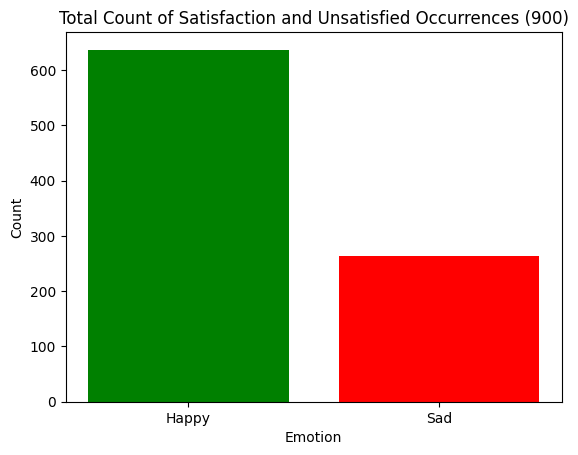

In [58]:
getSatisfactionGraph(totalFSReactions)

Satisfied Count: 3254 and Unsatisfied count: 1869


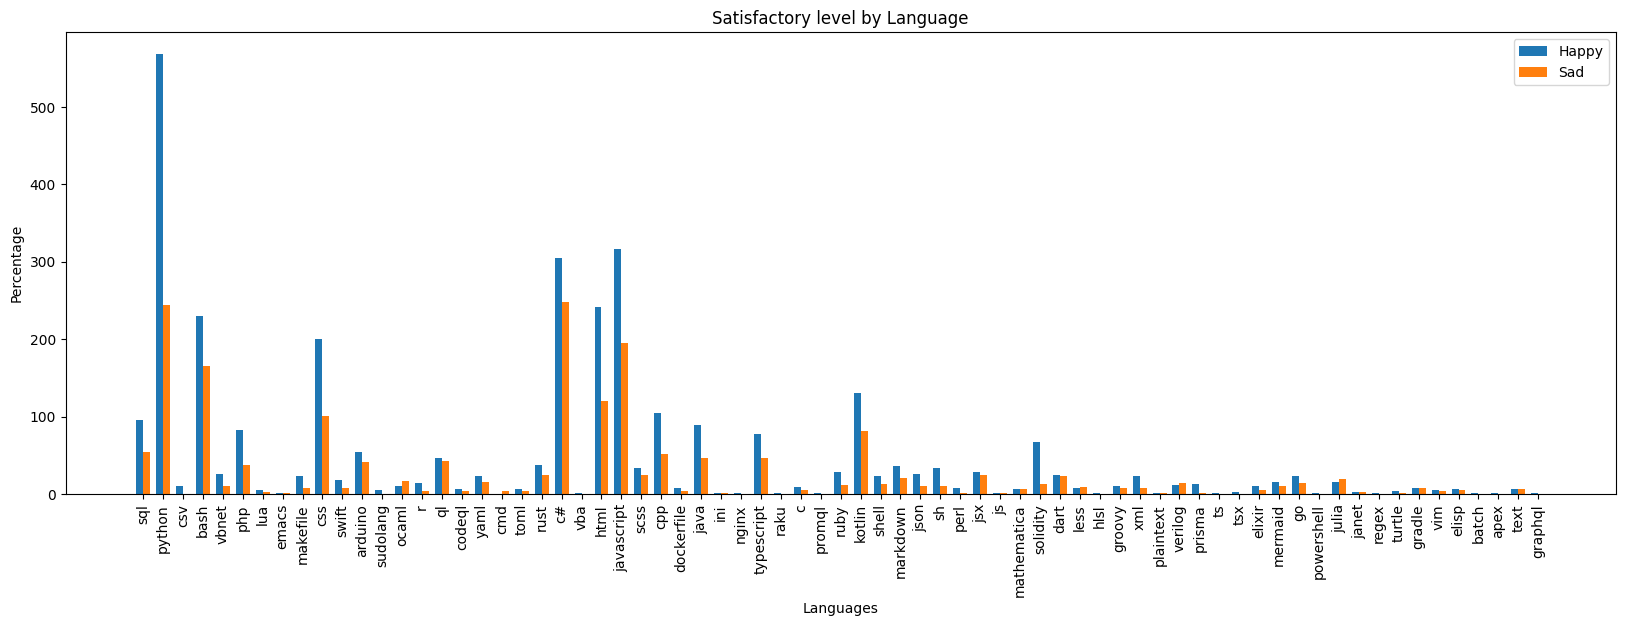

In [103]:
getSatisfactionGraphByLanguageWithBias(totalFSLang,totalFSReactions)

Satisfied Count: 2112 and Unsatisfied count: 727


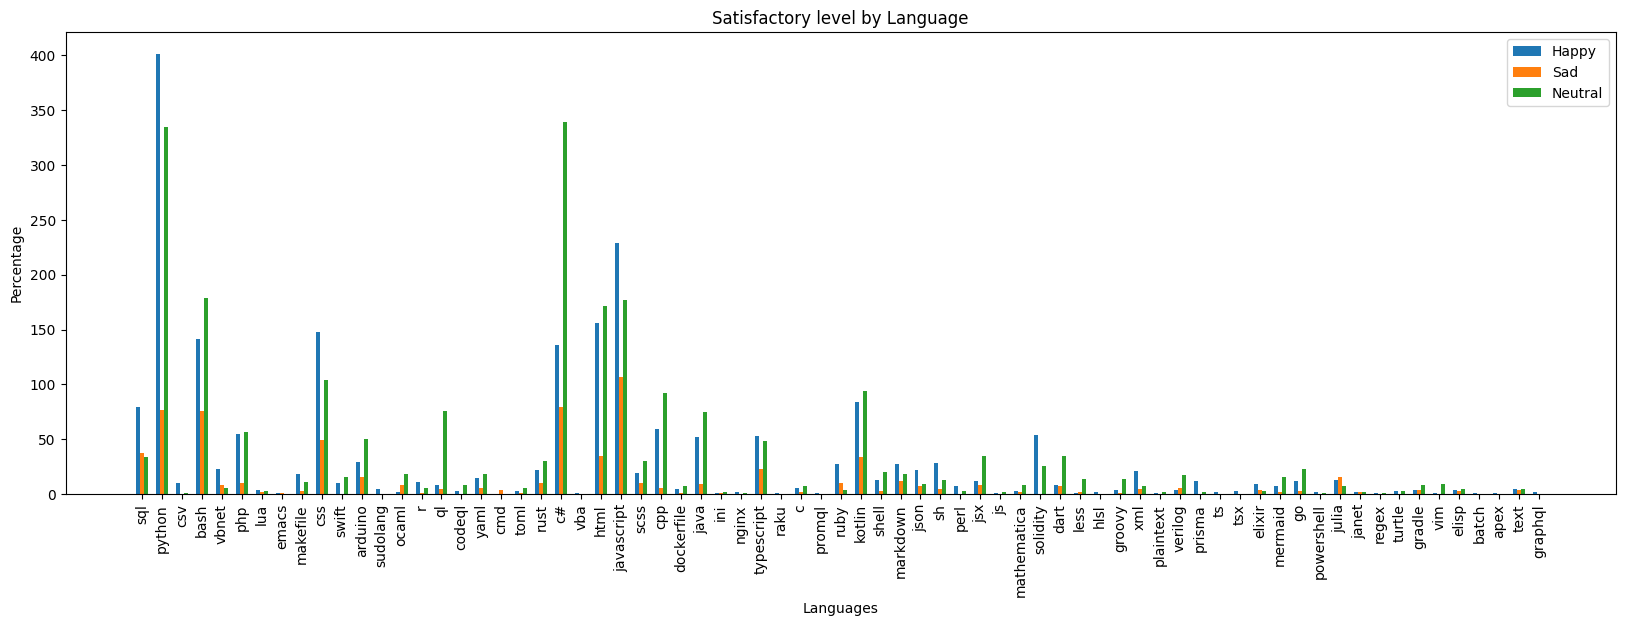

In [106]:
getSatisfactionGraphByLanguageWithNeutral(totalFSLang,totalFSReactions)